In [84]:
# Feature Extraction with RFE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



In [71]:
df = pd.read_csv("cleanData.csv",index_col='ID')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT_NEXT_MONTH
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,female,under graduate,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,female,under graduate,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,female,under graduate,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,female,under graduate,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,male,under graduate,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [89]:
def featureSelectionLogisticRegression(df,impAtt=10):
    df = pd.get_dummies(df)
    dfy = df['DEFAULT_PAYMENT_NEXT_MONTH']
    dfx = df.drop('DEFAULT_PAYMENT_NEXT_MONTH',axis =1)

    

    X = dfx.values
    Y = dfy.values
    
    #Standardizing the values
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    #Logistic regression model
    model = LogisticRegression()
    rfe = RFE(model, impAtt)
    fit = rfe.fit(X, Y)
    
    #print("Num Features: ",fit.n_features_)  
    #print("Selected Features: ",fit.support_) 
    #print("Feature Ranking: ",fit.ranking_) 
    
    impAttributes = dfx.columns
    impAttributes = list(impAttributes[fit.support_])
    
    return impAttributes
    
    

In [69]:
def featureSelectionTreeClassifier(df,impAtt=10):
    df = pd.get_dummies(df)
    dfy = df['DEFAULT_PAYMENT_NEXT_MONTH']
    dfx = df.drop('DEFAULT_PAYMENT_NEXT_MONTH',axis =1)

    

    X = dfx.values
    Y = dfy.values
    
    #Standardizing the values
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    #Tree classifier model
    model = ExtraTreesClassifier()
    model.fit(X, Y)
    
    impValues = model.feature_importances_
    impKeys = dfx.columns
    
    
    
    
    dictionary = dict(zip(impKeys, impValues))
    
    
    impAttributes = sorted(dictionary.items(), key = operator.itemgetter(1), reverse=True)
    
    impAttributesi = impAttributes[:impAtt]

    impAttributes = [impAttributesi[i][0] for i in range(len(impAttributesi))]

    
    return impAttributes
    
    

In [70]:
impAttributes = featureSelectionTreeClassifier(df,impAtt=12)
impAttributes

C:\Users\jeeva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


['PAY_1',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT3',
 'PAY_AMT6',
 'BILL_AMT2',
 'BILL_AMT4',
 'BILL_AMT6',
 'PAY_2',
 'PAY_AMT1',
 'BILL_AMT5']

In [90]:
impAttributes = featureSelectionLogisticRegression(df,impAtt=12)
impAttributes

C:\Users\jeeva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


['LIMIT_BAL',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'PAY_AMT1',
 'PAY_AMT2',
 'EDUCATION_uneducated',
 'EDUCATION_unknown',
 'MARRIAGE_single']

### We can observe that with Logistic regression recursive elimination technique We have found the important 
### attributes that constitute to the Defaulting credit card payment 


In [ ]:
data = pd.read_csv("cleanData.csv",index_col='ID')
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [85]:
def correlationHeatmaP(df):
    data = pd.get_dummies(df)
    dfy = df['DEFAULT_PAYMENT_NEXT_MONTH']
    dfx = df.drop('DEFAULT_PAYMENT_NEXT_MONTH',axis =1)

    

    X = dfx.values
    y = dfy.values
    
    corrmat = data.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,20))
    g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
    
    return True


True

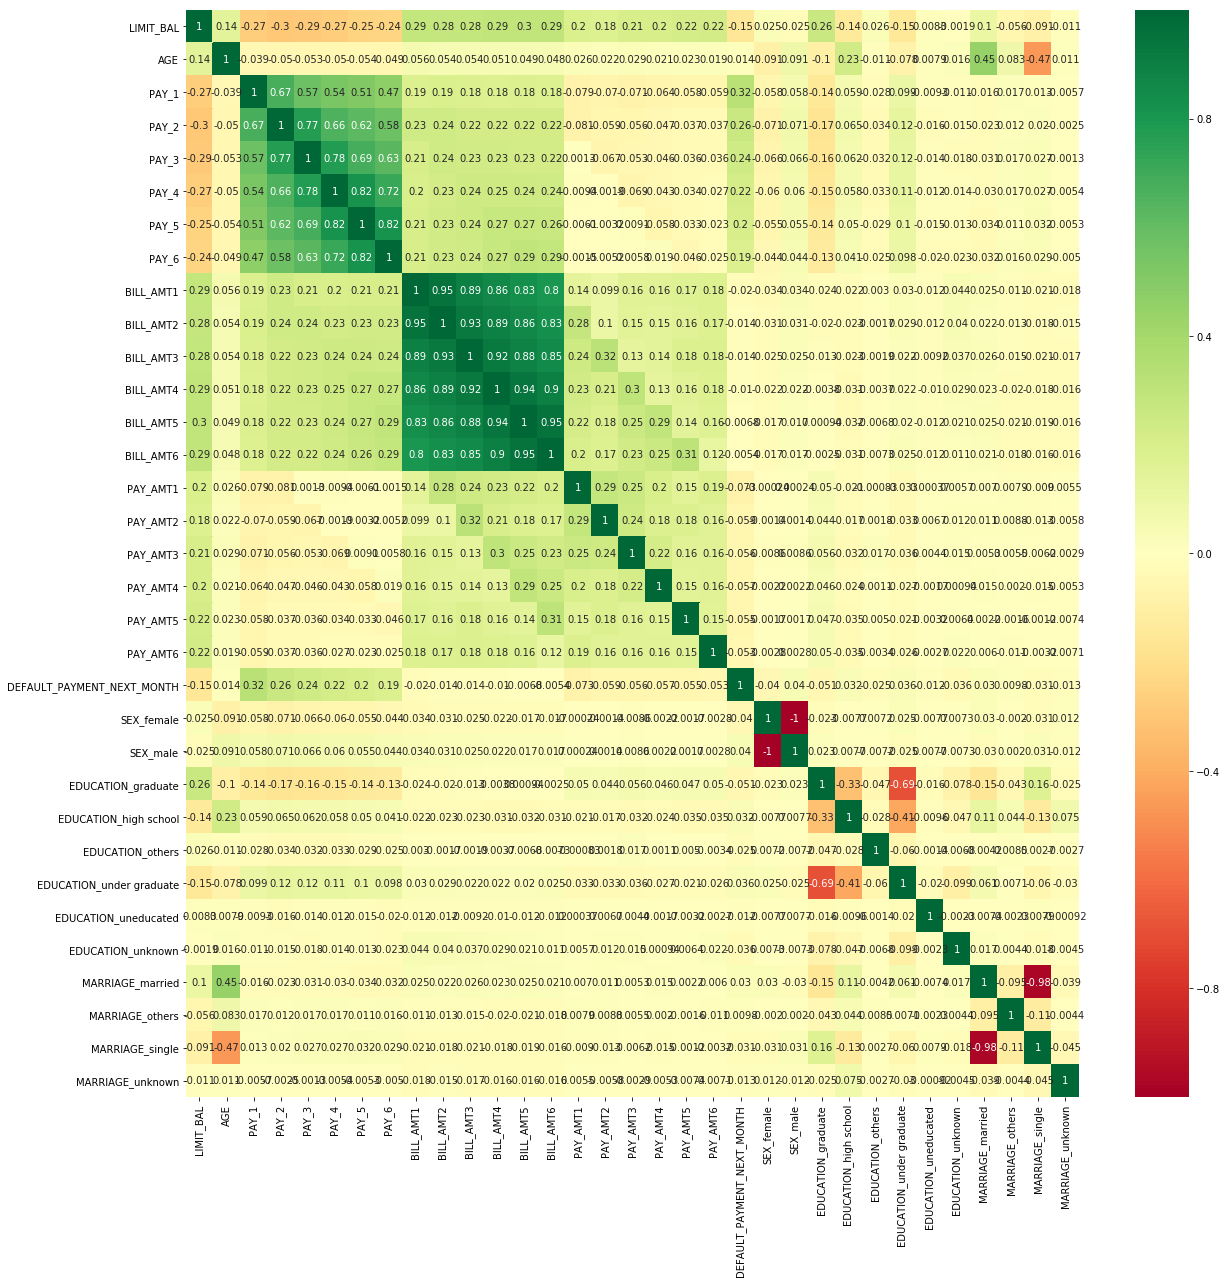

In [86]:
correlationHeatmaP(df)

### From the above heatmap we can observe that 
### PAY_M and PAY_N are highly correlated to each other. So, multi collinearity problem exists if we take all of PAY_N to build a model. Hence a subset of features need to be taken.
### Same is the case with BILL_AMTN
### But That is not the case with PAY_AMTN
### Here m,n is in [1,2,3,4,5,6]
